[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aaesha-Alteneiji/Foundation-Of-Data-Science/blob/main/AaeshaAlteneiji_Activity2_AirQuality.ipynb)

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [5]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-5-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [6]:
pollution_data = merged_data[['pm10','neighborhood']]

In [7]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [8]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [9]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [10]:
pollution_data['pm10'].min()

0.0

In [11]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [12]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [13]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [14]:
#Task 1.1: Displaying the first 5 rows
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [15]:
#Task 1.2: Printing the number of rows and columns
print("Rows:", joined_table.num_rows, ", Columns:", joined_table.num_columns)

Rows: 118495 , Columns: 2


In [16]:
#Task 1.3: Droping missing values from the joined table
joined_table.where("pm10", are.not_equal_to(np.nan))

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park
0.73,Bronx Park
1.22,Bronx Park
5.82,Bronx Park
11.04,Bronx Park
1.29,Bronx Park


In [17]:
#Confirming Task 1.3: Counting the number of droped rows
joined_table.num_rows - joined_table.where("pm10", are.not_equal_to(np.nan)).num_rows

0

In [18]:
#Confirming Task 1.3: Droping the missing value from the pollution data in the data frame format to confirm the zero missing values
pollution_data.dropna()

,pm10,neighborhood
0,11.35,Bronx Park
1,1.18,Bronx Park
2,0.76,Bronx Park
3,47.36,Bronx Park
4,6.18,Bronx Park
...,...,...
118760,4.03,Longwood
118761,6.20,Longwood
118762,0.00,Longwood
118763,2.49,Longwood


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [19]:
#Preparing the data for the remaining tasks: Converting merged data from dataframe to table
Air_Quality_Data = Table().from_df(merged_data)
Air_Quality_Data.show(2)

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,POINT (-73.870094 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [20]:
#Task 2.1: Calculating the summary statics and saving them in new table
Summary_Statistics = Table().with_columns("Attribute", make_array("temperature", "humidity", "pm25"),
                                          "mean", make_array(Air_Quality_Data.column("temperature").mean(), Air_Quality_Data.column("humidity").mean(), Air_Quality_Data.column("pm25").mean()),
                                          "median", make_array(np.median(Air_Quality_Data.column('temperature')), np.median(Air_Quality_Data.column('humidity')), np.median(Air_Quality_Data.column('pm25'))),
                                          "min", make_array(Air_Quality_Data.column("temperature").min(), Air_Quality_Data.column("humidity").min(), Air_Quality_Data.column("pm25").min()),
                                          "max", make_array(Air_Quality_Data.column("temperature").max(), Air_Quality_Data.column("humidity").max(), Air_Quality_Data.column("pm25").max()))
Summary_Statistics

Attribute,mean,median,min,max
temperature,8.24158,7.2,-7.9,10471
humidity,50.1549,46.2,0,104.2
pm25,7.37452,3.02,0,3267.02


In [21]:
#Task 2.2 + 2.3: Grouping the data by brorough and displaying the average pm25 value
pm25_average_by_borough = Air_Quality_Data.select("borough", "pm25").group("borough", np.average).sort("pm25 average", descending = True)
pm25_average_by_borough

borough,pm25 average
Bronx,7.795
Manhattan,2.37332
Queens,2.07253
Brooklyn,1.99695


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

Text(0.5, 1.0, 'PM2.5 by Borough')

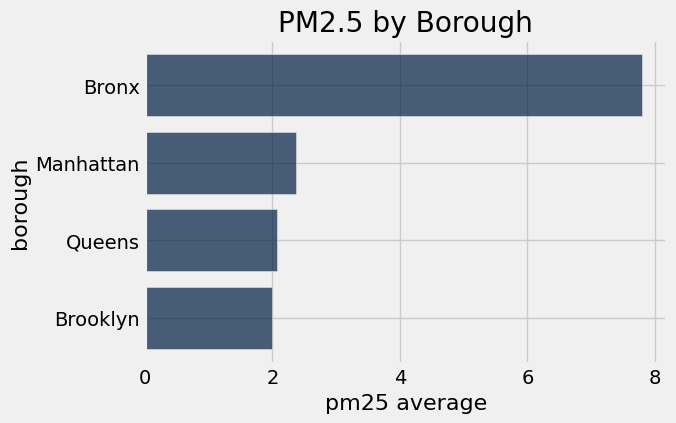

In [24]:
#Task 3.1: Displaying the average pm25 by borough in bar chart
pm25_average_by_borough.barh("borough", "pm25 average")
plt.title("PM2.5 by Borough")

Text(0, 0.5, 'PM2.5')

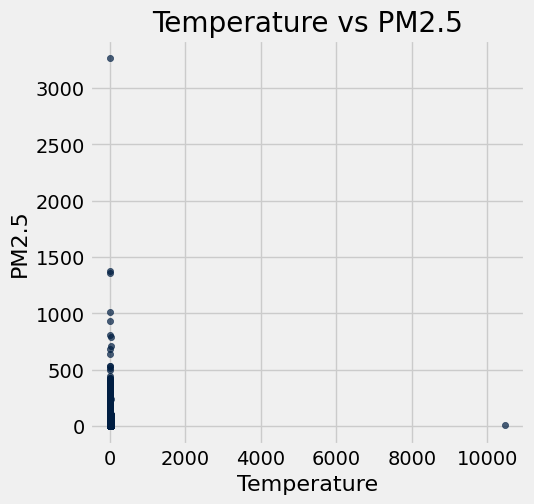

In [25]:
#Task 3.2: Displaying the relationship between temperature and pm25 using scatter plot
Air_Quality_Data.scatter("temperature", "pm25")
plt.title("Temperature vs PM2.5")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")

Text(0, 0.5, 'PM2.5')

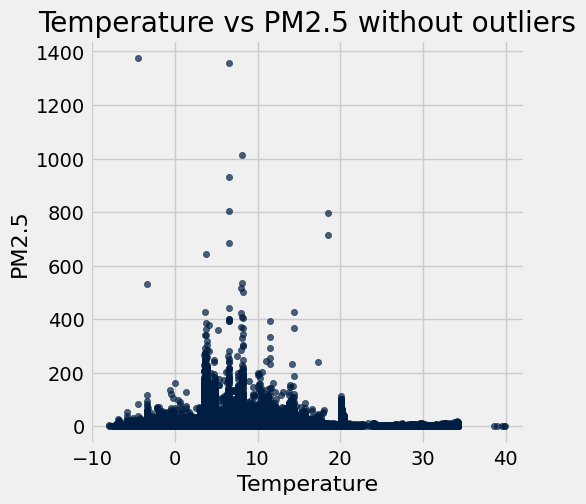

In [26]:
#Task 3.2 Extra: Displaying the relationship between temperature and pm25 using scatter plot after removing the outliers
Air_Quality_Data.where("temperature", are.below(10000)).where("pm25", are.below(3000)).scatter("temperature", "pm25")
plt.title("Temperature vs PM2.5 without outliers")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")


<ipython-input-64-c3f1c6d60541>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Air_Quality_Data.hist("humidity", bins= np.arange(Summary_Statistics.where("Attribute", "humidity").column("min") - 10, Summary_Statistics.where("Attribute", "humidity").column("max") + 10, 10))


Text(0.5, 1.0, 'Humidity Distribution')

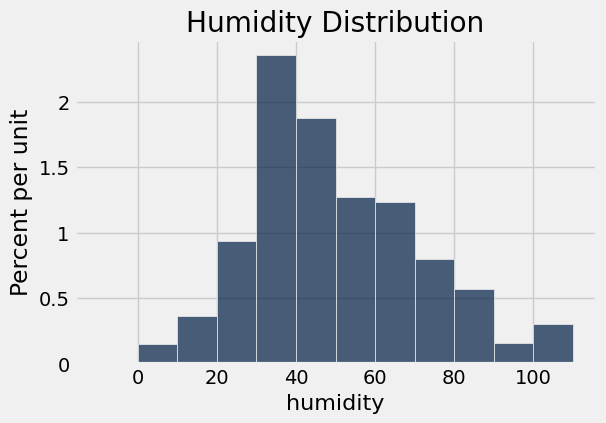

In [64]:
#Task 3.3: Displaying the distribution of humidity in histogram chart
Air_Quality_Data.hist("humidity", bins= np.arange(Summary_Statistics.where("Attribute", "humidity").column("min") - 10, Summary_Statistics.where("Attribute", "humidity").column("max") + 10, 10))
plt.title("Humidity Distribution")

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [28]:
#Task 4.1: Defining a function to categorizes PM2.5 levels

def calculate_pm25_category(pm25):
  if pm25 < 12:
    return "Good"
  elif pm25 >= 35:
    return "Unhealthy"
  else:
    return "Moderate"

In [29]:
#Task 4.2: Applying the PM2.5 function to categorize Air Quality table
Air_Quality_Category = Air_Quality_Data.with_columns("PM25_Category", Air_Quality_Data.apply(calculate_pm25_category, "pm25"))
Air_Quality_Category

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id,PM25_Category
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,POINT (-73.870094 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.1,0.74,0.76,0.76,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.2,1.15,4.48,47.36,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,20,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15.2,2.13,5.77,6.18,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.9,15.3,0.72,0.73,0.73,POINT (-73.870094 40.847176),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,17,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.8,15.4,1.09,1.22,1.22,POINT (-73.870102 40.847172),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,31,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.8,15.4,1.69,4.57,5.82,POINT (-73.870094 40.847176),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,22,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.7,15.5,1.33,5.61,11.04,POINT (-73.870102 40.847172),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.6,15.6,1.24,1.29,1.29,POINT (-73.870094 40.847168),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good


In [30]:
#Task 4.3: Grouping the data by PM2.5 category to display the count
Air_Quality_Category.group("PM25_Category")

PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [31]:
#Task 5.1: Sampling 10% of the Air Quality Data
Sample_Data = Air_Quality_Data.sample(round(0.10*Air_Quality_Data.num_rows))
Sample_Data

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1579696200,40.8423,-73.8717,17,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.1,61.5,1.6,2.71,228.07,POINT (-73.871719 40.842281),292,Van Nest,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Van Nest
NYCP1_01A,1580142180,40.8647,-73.899,60,6,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.1,57.4,3.06,4.49,4.66,POINT (-73.898972 40.864712),105,Fordham,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Fordham
NYCP1_01A,1579701360,40.8236,-73.8876,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.5,54.1,0.38,0.39,0.39,POINT (-73.887627 40.823643),176,Longwood,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Longwood
NYCP1_01A,1580841540,40.8538,-73.8692,15,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,68.3,3.09,21.52,45.03,POINT (-73.869209 40.853798),39,Bronxdale,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronxdale
NYCP1_01A,1579700940,40.8248,-73.8949,19,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.7,53.9,1.61,1.79,1.79,POINT (-73.894852 40.824768),176,Longwood,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Longwood
NYCP1_01A,1579908540,40.8437,-73.8959,93,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.3,42.2,4.1,4.38,4.38,POINT (-73.895874 40.843731),284,Tremont,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Tremont
NYCP1_01A,1579563180,40.8073,-73.9434,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.3,37.9,0.43,0.44,0.44,POINT (-73.943405 40.80732),128,Harlem,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Harlem
NYCP1_01A,1580140500,40.8688,-73.8764,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.9,55.9,0.76,0.77,0.77,POINT (-73.876381 40.868824),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579714320,40.8175,-73.9012,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3,32.7,0.84,0.99,0.99,POINT (-73.901192 40.817528),176,Longwood,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Longwood
NYCP1_01A,1581607980,40.8189,-73.8986,253,82,26,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5,102.8,21.75,29.06,29.51,POINT (-73.898605 40.818867),176,Longwood,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Longwood


In [32]:
#Task 5.2: Calculating PM2.5 mean for the sampled data
Sample_Data.column("pm25").mean()

7.1148084388185646

In [43]:
#Task 5.3: Creating a loop to sample 10% of Air Quality Data 100 times
PM25_mean = []
for i in range(100):
  sample_data = Air_Quality_Data.sample(round(0.10*Air_Quality_Data.num_rows))
  PM25_mean.append(sample_data.column("pm25").mean())

PM25_mean

[7.1972683544303804,
 7.0565940928270043,
 7.285772995780591,
 7.4633485232067507,
 7.2793291139240495,
 7.3327046413502108,
 7.6894464135021101,
 7.3562396624472575,
 7.481059915611814,
 7.2052886075949365,
 7.7801594936708875,
 7.1346945147679328,
 7.5022413502109702,
 7.6721291139240506,
 7.2796810126582283,
 7.3266869198312241,
 7.8541662447257377,
 7.3975392405063287,
 7.2637586497890299,
 7.3095426160337551,
 7.2677341772151909,
 6.8416801687763718,
 7.3202759493670886,
 7.3456818565400832,
 7.9067265822784831,
 7.3159071729957805,
 7.3189004219409286,
 7.4247502109704646,
 7.3035687763713071,
 7.2745527426160335,
 7.49453924050633,
 7.5059443037974685,
 7.4368320675105481,
 7.2026970464135012,
 7.3503789029535858,
 7.1171232067510548,
 7.4819493670886077,
 7.4481367088607593,
 7.5966978902953599,
 7.0899654008438819,
 7.4126185654008436,
 7.417886075949367,
 7.5405468354430392,
 7.556033755274262,
 7.4020877637130802,
 7.453300421940928,
 7.3337594936708861,
 6.9720185654008437,

Text(0, 0.5, 'percent per unit')

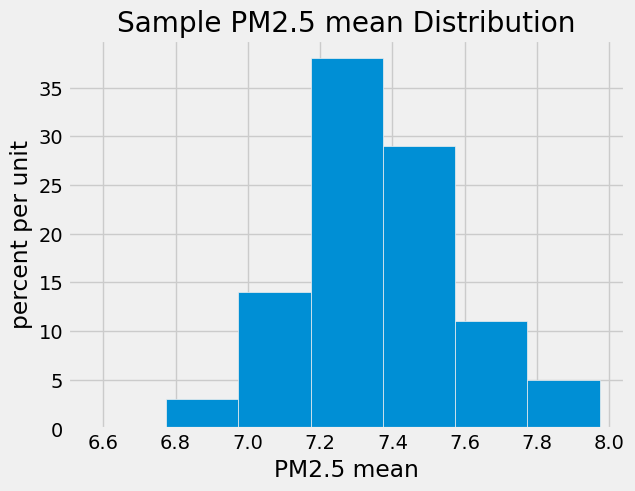

In [63]:
#Task 5.4: Displaying the PM2.5 for sampled data in histogram
plt.hist(PM25_mean, bins = np.arange(min(PM25_mean)-0.2, max(PM25_mean)+0.2, 0.2))
plt.title("Sample PM2.5 mean Distribution")
plt.xlabel("PM2.5 mean")
plt.ylabel("percent per unit")

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.